In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

# Which variable is the best predictor for price?

In [5]:
df = pd.read_csv("HousingPrices.csv")
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


# Histograms

Text(0.5, 1.0, 'House Prices')

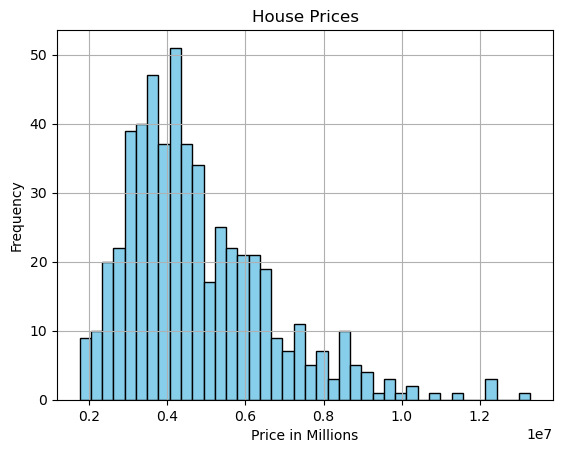

In [7]:
#Histogram for price of houses in millions. This is our dependent variable.
df['price'].hist(bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Price in Millions')
plt.ylabel('Frequency')
plt.title('House Prices')

Text(0.5, 1.0, 'Area in Total Square Feet')

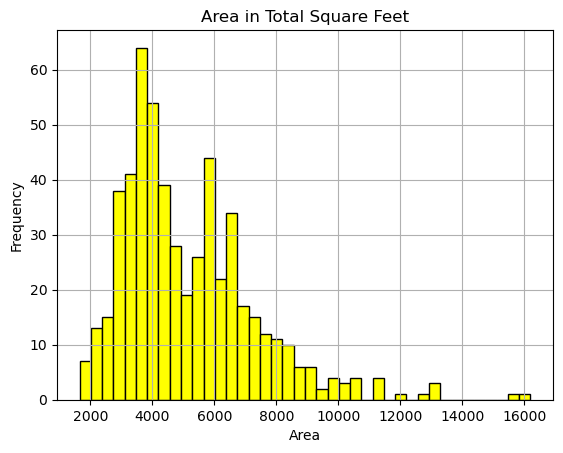

In [8]:
#Histogram for total area of each house.
df['area'].hist(bins=40, color='yellow', edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Area in Total Square Feet')

Text(0.5, 1.0, 'Total Amount of Bedrooms')

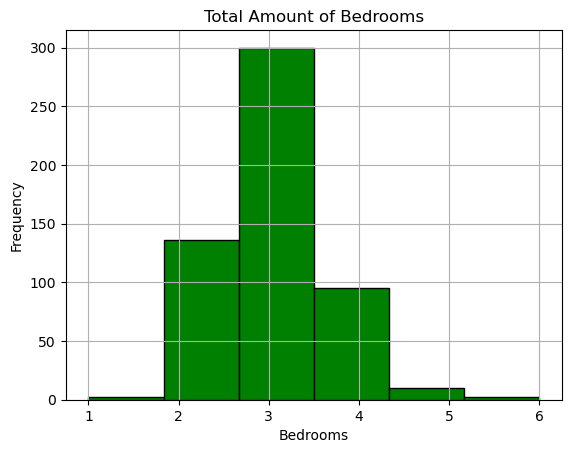

In [9]:
#Histogram for the total amount of bedrooms in each house.
df['bedrooms'].hist(bins=6, color='green', edgecolor='black')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Total Amount of Bedrooms')

Text(0.5, 1.0, 'Total Amount of Bathrooms')

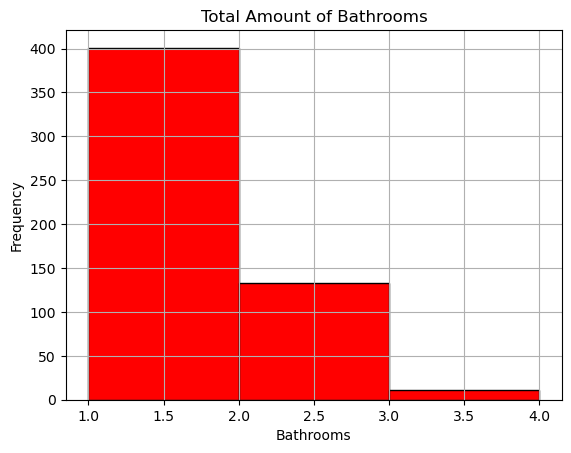

In [10]:
##Histogram for the total amount of bathrooms in each house.
df['bathrooms'].hist(bins=3, color='red', edgecolor='black')
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.title('Total Amount of Bathrooms')

Text(0.5, 1.0, 'Amount of Stories')

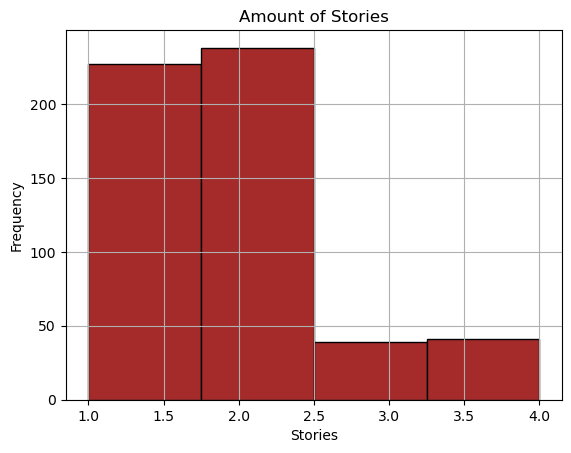

In [11]:
#Histogram for how many stories each house has.
df['stories'].hist(bins=4, color='brown', edgecolor='black')
plt.xlabel('Stories')
plt.ylabel('Frequency')
plt.title('Amount of Stories')

# Summary Statistics

In [13]:
priceMean = df.price.mean()
priceMode = df.price.mode()
priceSpread = df.price.var()
print("The mean of the variable price is:", priceMean)
print("The mode of the variable price is:", priceMode)
print("The spread of the variable price is:", priceSpread)
print("The tail trails off to the right.")

The mean of the variable price is: 4766729.247706422
The mode of the variable price is: 0    3500000
1    4200000
Name: price, dtype: int64
The spread of the variable price is: 3498544355820.5796
The tail trails off to the right.


In [14]:
areaMean = df.area.mean()
areaMode = df.area.mode()
areaSpread = df.area.var()
print("The mean of the variable area is:", areaMean)
print("The mode of the variable area is:", areaMode)
print("The spread of the variable area is:", areaSpread)
print("The tail trails off to the right similar to price.")

The mean of the variable area is: 5150.54128440367
The mode of the variable area is: 0    6000
Name: area, dtype: int64
The spread of the variable area is: 4709512.057575553
The tail trails off to the right similar to price.


In [15]:
bedroomsMean = df.bedrooms.mean()
bedroomsMode = df.bedrooms.mode()
bedroomsSpread = df.bedrooms.var()
print("The mean of the variable bedrooms is:", bedroomsMean)
print("The mode of the variable bedrooms is:", bedroomsMode)
print("The spread of the variable bedrooms is:", bedroomsSpread)
print("The tail trails off to the right more than it does to the left.")

The mean of the variable bedrooms is: 2.9651376146788992
The mode of the variable bedrooms is: 0    3
Name: bedrooms, dtype: int64
The spread of the variable bedrooms is: 0.5447382622773889
The tail trails off to the right more than it does to the left.


In [16]:
bathroomsMean = df.bathrooms.mean()
bathroomsMode = df.bathrooms.mode()
bathroomsSpread = df.bathrooms.var()
print("The mean of the variable bathrooms is:", bathroomsMean)
print("The mode of the variable bathrooms is:", bathroomsMode)
print("The spread of the variable bathrooms is:", bathroomsSpread)
print("The tail trails off to the right.")

The mean of the variable bathrooms is: 1.2862385321100918
The mode of the variable bathrooms is: 0    1
Name: bathrooms, dtype: int64
The spread of the variable bathrooms is: 0.2524757150566683
The tail trails off to the right.


In [17]:
storiesMean = df.stories.mean()
storiesMode = df.stories.mode()
storiesSpread = df.stories.var()
print("The mean of the variable stories is:", storiesMean)
print("The mode of the variable stories is:", storiesMode)
print("The spread of the variable stories is:", storiesSpread)
print("The tail trails off to the right.")

The mean of the variable stories is: 1.8055045871559634
The mode of the variable stories is: 0    2
Name: stories, dtype: int64
The spread of the variable stories is: 0.7525431732326017
The tail trails off to the right.


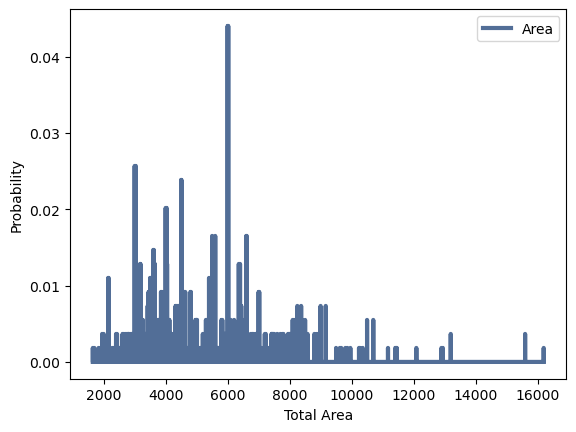

In [18]:
pmf = thinkstats2.Pmf(df.area, label="Area")
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Total Area", ylabel="Probability")

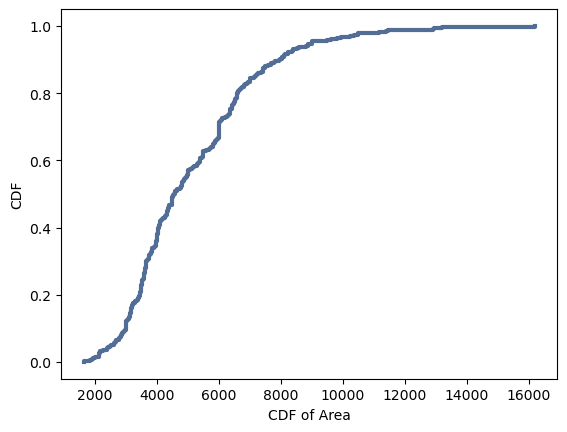

In [19]:
cdf = thinkstats2.Cdf(df.area)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='CDF of Area', ylabel='CDF')

This CDF of the area in each house tells us that the distribution is not normal. It would be more of an S shape if it was normally distributed. This means that most of the houses are 8000 square feet or more.

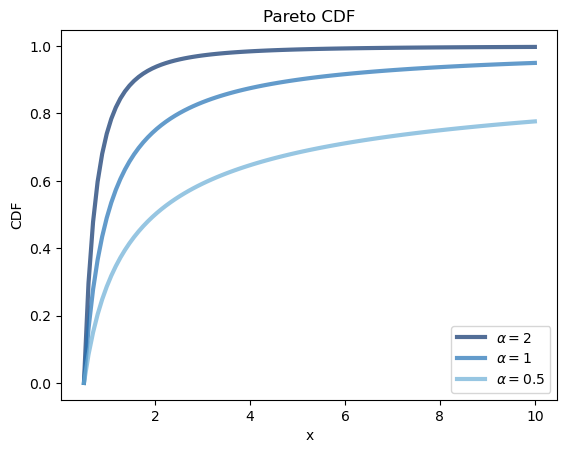

In [21]:
#CDF of the Pareto Distribution
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0, 1.0, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100)
    thinkplot.Plot(xs, ps, label=r"$\alpha=%g$" % alpha)

thinkplot.Config(title="Pareto CDF", xlabel="x", ylabel="CDF", loc="lower right")

This is a Pareto Distribution and the CDF of the area looks similar to line of alpha = 1. This means that the majority of houses have areas in the 80th percentile.

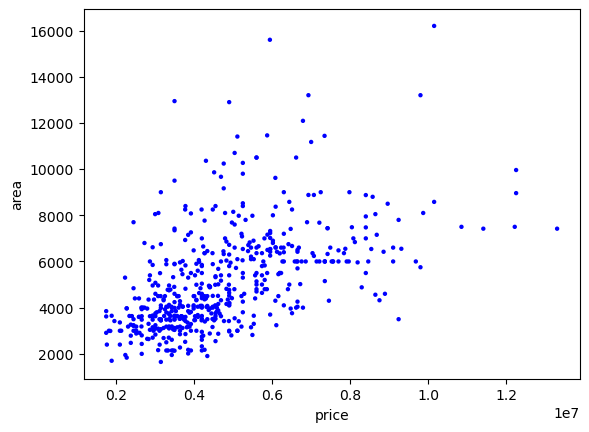

In [23]:
price = df.price
area = df.area

thinkplot.Scatter(price, area, alpha=1, s=10)
thinkplot.Config(xlabel='price',
                     ylabel='area',
                     legend=False)

In [24]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [25]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [26]:
#Pearson Correlation of area and price
Corr(area, price)

0.5359973457780802

The Pearson Correlation being .5 means that they have a positive relation but not a very strong relationship. Looking at the scatterplot, you can see that there are many houses at the same square footage with low and high prices. This lead me to believe that area is not a strong predictor of price and that there is instead something else not in this data that is a stronger predictor.

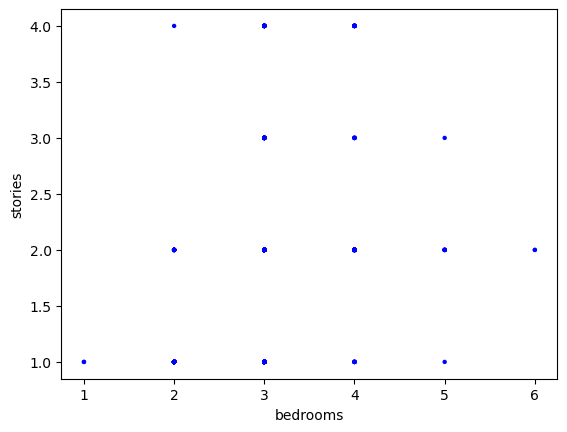

In [28]:
bedrooms = df.bedrooms
stories = df.stories

thinkplot.Scatter(bedrooms, stories, alpha=1, s=10)
thinkplot.Config(xlabel='bedrooms',
                     ylabel='stories',
                     legend=False)

In [29]:
#Pearson Correlation for stories and bedrooms
Corr(stories, bedrooms)

0.40856423753815135

The Pearson correlation being .4 means that stories and bedrooms have a positive but not a very strong relationship. It would make sense that more stories means more bedrooms but this is not necessarily the case.

In [31]:
#Apparent effect - the price of a house is effected by the area
#Null hypothesis - the area has no effect on the price of a house
#This is done by testing the Pearson Correlation, as done above. Area does not seem to have a great effect on the price 
#of a house with their correlation coefficient at .5

# Linear Regression

In [33]:
X = df[['area']] 
y = df['price']

In [34]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
attributes_coefficients = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])  
attributes_coefficients

,Coefficient
area,428.472666


In [37]:
#Each increase of the area sees an increase of about $428 in price.

In [38]:
y_pred = reg.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comparison

,Actual,Predicted
316,4060000,5.072844e+06
77,6650000,5.329928e+06
360,3710000,4.275885e+06
90,6440000,4.687219e+06
493,2800000,4.241608e+06
...,...,...
172,5250000,6.144026e+06
124,5950000,5.340640e+06
388,3500000,4.108781e+06
521,2408000,4.102354e+06


In [39]:
from sklearn import metrics  
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

MAE: 1401283.7270683737
MSE: 3296594592847.056
RMSE: 1815652.6630517899


In [40]:
#The RMSE being very large means that this is not the best regression model.